In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

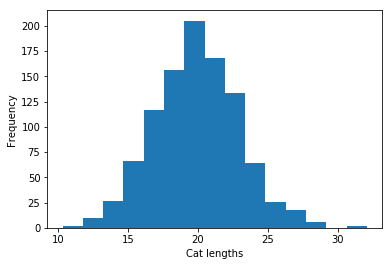

In [5]:
# Set the seed for replication purposes
np.random.seed(443)

# Define MU, STD and the amount of samples
mu, std = 20, 3
num_samples = 1000

# Sample from the distribution
samples = np.random.normal(mu, std, num_samples)

# Plot the histogram with 15 bins
plt.xlabel("Cat lengths")
plt.ylabel("Frequency")
plt.hist(samples, bins=15)
plt.show()

In [12]:
# Let us apply maximum log-likelihood!
# We will pretend we do not know the mean and the variance
# The process we will now apply, is a grid search to maximize the log-likelihood. Since
# we have an analytical distribution, we could just take the derivative, but for illustration purposes
# we will do it this way.
# The grid search is over MU: 0...25 and VAR: 0...10
mu_range = np.arange(0, 25, 1)
std_range = np.arange(0, 10, 1)

def max_loglikelihood_approach(x, mu_range, std_range):
    ml_mu, ml_std = 0, 0
    maximum_likelihood = -100000
    for mu in mu_range:
        for std in std_range:
            # Calculate the log-likelihood
            cur_lik = np.sum([np.log(norm.pdf(x, mu, std)) for x in samples])

            # If current LL is higher than our previous one, update our variables
            if cur_lik > maximum_likelihood:
                maximum_likelihood = cur_lik
                ml_mu, ml_std = mu, std
    return ml_mu, ml_std

ml_mu, ml_std = max_loglikelihood_approach(x, mu_range, std_range)
print("Maximum Log-Likelihood grid search result")
print("MU: ", ml_mu)
print("STD: ", ml_std)

Maximum Log-Likelihood grid search result
MU:  20
STD:  3


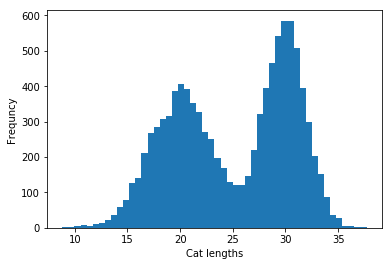

In [8]:
# We will now show a visual representation of a multimodal distribution

np.random.seed(405)
dist1 = np.random.normal(20, 3, 5000) # Dist. 1, with mu = 20 and std = 3
dist2 = np.random.normal(30, 2, 5000) # Dist. 2 with mu = 30 and std = 2

# Combine the two distributions
multimodal_distribution = np.append(dist1, dist2)

plt.xlabel("Cat lengths")
plt.ylabel("Frequncy")
plt.hist(multimodal_distribution, bins=50)
plt.show()

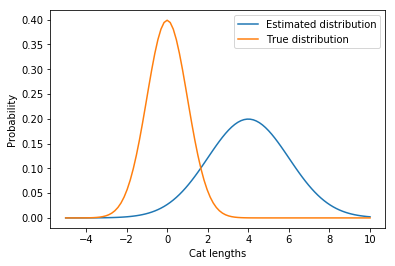

In [16]:
# We will proceed with giving an example of overfitting on the training data
# Here, we get samples acquired from a N(0,1) normal distribution, and estimate the parameters of the Gaussian distribution
# using maximum loglikelihood. A solution for this approach (not shown here), is to measure the maximum log-likelihood on the
# test set, instead of on the train set, as done here
true_mu, true_std = 0, 1
train_samples = np.random.normal(true_mu, true_std, 10)

mu_train, std_train = max_loglikelihood_approach(train_samples, np.arange(0, 5, 1), np.arange(0, 3, 1))
x = np.linspace(-5, 10, 100)
y_train = norm.pdf(x, mu_train, std_train)
y_test = norm.pdf(x, true_mu, true_std)

fig = plt.figure()
plt.xlabel("Cat lengths")
plt.ylabel("Probability")
plt.plot(x, y_train, label="Estimated distribution")
plt.plot(x, y_test, label="True distribution")
plt.legend()

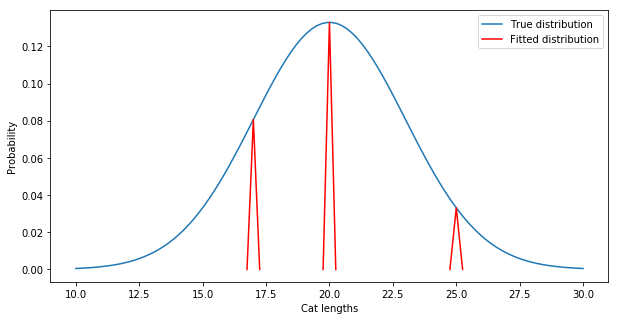

In [9]:
# Generation of the image illustrating of the overfitting image in the chapter
mu, std = 20, 3
x = np.linspace(10, 30, 100)
y = norm.pdf(x, mu, std)

delta_x = .25
x_train = [17, 20, 25]

plt.figure(figsize=(10,5))
plt.xlabel("Cat lengths")
plt.ylabel("Probability")
plt.plot(x, y, label="True distribution")
for x_t in x_train:
    xs = [x_t - delta_x, x_t, x_t + delta_x]
    ys = [0, norm.pdf(x_t, mu, std), 0]
    label = "Fitted distribution" if x_t == 17 else ""
    plt.plot(xs, ys, c='r', label=label)
plt.legend()
plt.show()

In [17]:
# Last, but not least, we will show an example of how we could sample from a histogram, given some samples from a N(0,1)
# distribution
samples = np.random.normal(0, 1, 50)

# Acquire the histogram using numpy, with 10 bins 
hist, bins = np.histogram(samples, bins=10)

# Acquire the midpoints of the bin locations, of which we will essentially sample from
bin_midpoints = bins[:-1] + np.diff(bins)/2

# Create a cumulative distribution function from our histogram
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

# Get 10 U(0, 1) samples, whose corresponding sample values we will search for in the cdf
unif_samples = np.random.rand(10)
bin_values = np.searchsorted(cdf, unif_samples)

# 'Generate' samples by getting the bin midpoints of the acquired sample values
gen_samples = bin_midpoints[bin_values]

print(gen_samples)

[ 0.33518117  0.73816527 -0.06780293 -0.47078704 -0.87377114 -0.06780293
  0.33518117 -0.87377114 -0.87377114 -0.47078704]
